## Plot confusion matrix on test set

In [2]:
from pathlib import Path
import numpy as np
import os
import yaml
from src.utils.plot_utils import plot_confusion_matrix
from sklearn.metrics import matthews_corrcoef as MCC


/Users/nicolebussola/anaconda3/envs/otsuka/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

with open("../configs/eval.yaml", 'r') as stream:
    eval_config = yaml.safe_load(stream)

ckpt_path = os.path.dirname(eval_config['ckpt_path'])
experiment_dir = f"../{'/'.join(ckpt_path.split('/')[1:])}"
batch_test_preds = np.load(Path(experiment_dir) / "test_preds.npy")
batch_test_targets = np.load(Path(experiment_dir) /"test_targets.npy")
test_preds = np.concatenate(batch_test_preds, axis=None)
test_targets = np.concatenate(batch_test_targets, axis=None)

print("MCCC on test set = ", round(MCC(test_targets, test_preds),3))

MCCC on test set =  0.755


In [4]:
ckpt_path = os.path.dirname(eval_config['ckpt_path'])
experiment_dir = f"../{'/'.join(ckpt_path.split('/')[1:])}"
batch_test_preds = np.load(Path(experiment_dir) / "test_preds.npy")
batch_test_targets = np.load(Path(experiment_dir) /"test_targets.npy")
test_preds = np.concatenate(batch_test_preds, axis=None)
test_targets = np.concatenate(batch_test_targets, axis=None)

MCC(test_targets, test_preds)

0.7546160672259291

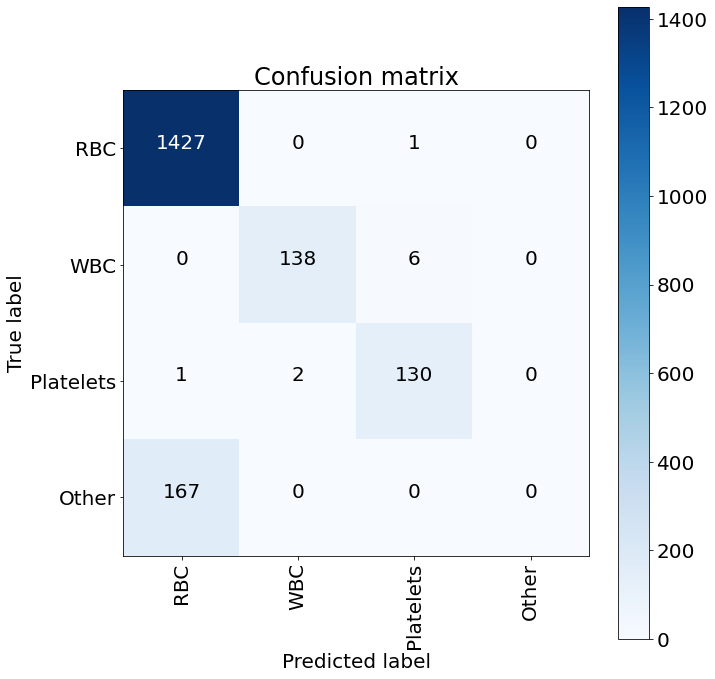

In [5]:
plot_confusion_matrix(experiment_dir=experiment_dir, 
                      classes=["RBC","WBC", "Platelets", "Other"], 
                      normalize=False, 
                      preds = test_preds,
                      trues = test_targets,

                      save=True, filename='', ext='pdf')